In [ ]:
! pip install ONE-api
! pip install ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.3/292.3 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
!git clone -b imbizo https://github.com/int-brain-lab/paper-brain-wide-map.git
%cd /content/paper-brain-wide-map
!pip install -e

Cloning into 'paper-brain-wide-map'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (1075/1075), done.
remote: Compressing objects: 100% (389/389), done.
remote: Total 1968 (delta 811), reused 866 (delta 683), pack-reused 893
Receiving objects: 100% (1968/1968), 4.97 MiB | 13.08 MiB/s, done.
Resolving deltas: 100% (1246/1246), done.
/content/paper-brain-wide-map

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


In [ ]:
# Instanciate the ONE cache
from pathlib import Path
ibl_cache = Path.home() / 'Downloads' / 'IBL_Cache'
ibl_cache.mkdir(exist_ok=True, parents=True)

# Setup the ONE API
from one.api import ONE
ONE.setup()

Param ALYX_URL, current value is ["https://openalyx.internationalbrainlab.org"]:
Param ALYX_LOGIN, current value is ["intbrainlab"]:
Param HTTP_DATA_SERVER, current value is ["https://ibl.flatironinstitute.org/public"]:
Param HTTP_DATA_SERVER_LOGIN, current value is ["None"]:
Enter the FlatIron HTTP password for None (leave empty to keep current): ··········
Enter the location of the download cache, current value is ["/root/Downloads/ONE/openalyx.internationalbrainlab.org"]:
Would you like to set this URL as the default one? [Y/n]
Are the above settings correct? [Y/n]
ONE Parameter files location: /root/.one


IBLParams(CLIENT_MAP={'openalyx.internationalbrainlab.org': '/root/Downloads/ONE/openalyx.internationalbrainlab.org'}, DEFAULT='openalyx.internationalbrainlab.org')

In [ ]:
from one.api import ONE
from brainbox.population.decode import get_spike_counts_in_bins
from brainbox.io.one import SpikeSortingLoader, SessionLoader
from brainbox.ephys_plots import plot_brain_regions
from brainbox.behavior.wheel import velocity
from brainbox.task.trials import get_event_aligned_raster, get_psth
from ibllib.atlas import AllenAtlas
from brainwidemap import bwm_query
from brainwidemap.imbizo.encoding_functions import get_choice_time_shuffle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

one = ONE(base_url='https://openalyx.internationalbrainlab.org', \
          password='international', silent=True, cache_dir=ibl_cache)

ba = AllenAtlas()

/usr/local/lib/python3.10/dist-packages/ibllib/atlas/__init__.py:205: DeprecationWarning: ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use this module instead
  warnings.warn('ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use '
/usr/local/lib/python3.10/dist-packages/ibllib/atlas/atlas.py:13: DeprecationWarning: ibllib.atlas.atlas.AllenAtlas is deprecated. Use iblatlas.atlas.AllenAtlas instead
  warnings.warn(warning_text, DeprecationWarning)


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960


100%|██████████| 31.470260620117188/31.470260620117188 [00:06<00:00,  4.60it/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 4035363


100%|██████████| 3.848422050476074/3.848422050476074 [00:02<00:00,  1.89it/s]


In [ ]:
import pandas as pd

Place to search for region acronym https://search.brain-map.org/search/index.html?query=posterior%20parietal%20cortex&fa=false&e_sp=t&e_ag=t&e_tr=t&e_fa=t

In [ ]:
acronym = 'STR'
insertions = one.search_insertions(atlas_acronym=acronym, query_type='remote')

In [ ]:
#to do, cannot find PPC, Center2, center3?
acronym_2 = 'CENT2' #PoPC
insertions_2 = one.search_insertions(atlas_acronym=acronym_2, query_type='remote')

In [ ]:
insertions_2[0]

'a759e857-fd8f-4653-a397-c48547230427'

In [ ]:
#sessions = one.search(atlas_acronym=acronym, query_type='remote')

In [ ]:
#len(sessions)

154

In [ ]:
# one = ONE()
# eid = 'f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad'
# trials = one.load_object(eid, 'trials', collection='alf')

In [ ]:
# trials.to_df()

,goCueTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,probabilityLeft,feedback_times,feedbackType,rewardVolume,firstMovement_times,intervals_0,intervals_1
0,101.055802,102.437889,101.056593,101.373102,-1.0,101.154650,NaN,1.0000,0.5,101.373228,1.0,1.5,101.147532,100.303602,102.937904
1,104.871307,106.221143,104.872178,105.150709,-1.0,104.871179,NaN,1.0000,0.5,105.150817,1.0,1.5,104.834532,103.632902,106.721217
2,108.888023,110.471118,108.888777,109.403725,-1.0,108.887877,NaN,0.0625,0.5,109.403825,1.0,1.5,109.276532,107.473218,110.971232
3,113.804633,115.121053,113.805352,114.048533,1.0,113.804518,0.125,NaN,0.5,114.048627,1.0,1.5,113.850532,111.664932,115.621135
4,118.454620,119.720960,118.455587,118.658219,1.0,118.454420,0.250,NaN,0.5,118.658333,1.0,1.5,118.557532,116.325033,120.221012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,3425.311001,3428.227476,3425.312235,3426.146098,1.0,3425.310901,NaN,0.2500,0.2,3426.147218,-1.0,0.0,3425.984532,3424.278005,3428.727490
554,3430.027485,3433.177348,3430.028430,3431.107986,1.0,3430.027363,NaN,1.0000,0.2,3431.109088,-1.0,0.0,3430.877532,3429.475385,3433.677391
555,3435.143891,3445.593540,3435.144651,3444.529812,-1.0,3435.143785,NaN,1.0000,0.2,3444.529913,1.0,1.5,3444.369532,3434.426890,3446.093617
556,3448.760614,3450.310201,3448.761423,3449.239613,-1.0,3448.760423,NaN,0.2500,0.2,3449.239708,1.0,1.5,3449.022532,3446.821917,3450.810313


In [ ]:
#sessions = one.search(atlas_acronym=acronym, query_type='remote')

#spike_loader = SpikeSortingLoader(eid=eid, one=one, pname=pname)

# from brainbox.io.one import SpikeSortingLoader
# # import ONE and instantiate
# from one.api import ONE
# one = ONE()
# # define pid
# pid = '695476f6-4c14-4a2f-b658-948514629079'

# # instantiate with a pid
# spike_loader = SpikeSortingLoader(pid=pid, one=one)

# # alternatively instantiate with an eid and probe name
# eid, pname = one.pid2eid(pid)
# spike_loader = SpikeSortingLoader(eid=eid, one=one, pname=pname)

In [ ]:
len(insertions)

154

In [ ]:
from tqdm import tqdm

In [ ]:
# np.save('good_STR_count.npy', good_STR_lst)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# np.save('/content/drive/My Drive/good_STR_count1.npy', good_STR_lst)

Mounted at /content/drive


In [ ]:
# lst_try = np.load('good_STR_count.npy') # np.load('/content/drive/My Drive/good_STR_count1.npy')
# lst_try

array([ 0,  0,  1,  3,  2,  0,  0,  1,  0,  6,  2,  0, 13,  0,  0,  0,  0,
        0,  0,  8,  0,  0,  2, 38,  3,  0,  0,  0,  0,  0,  0,  9,  1,  2,
        0,  0,  0,  0,  2,  0,  0,  0,  0, 64,  0,  5,  0,  0,  1,  0,  4,
        0, 14,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  7,  0,  0,  1,  3, 10,  2,  0,  2,  0,  0,  5,  0,
        6,  0,  0,  0, 25,  6,  0,  0,  0,  0,  4,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  4,  0,  0,  2,  0,  0,  0,  2, 11,  2,  9,  3,  3,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  3,
       17, 12,  0,  1,  0,  0,  0,  0,  3,  3, 11,  2,  0, 11,  2,  0,  1,
       17])

In [ ]:
lst_try = np.load('/content/drive/My Drive/good_STR_count1.npy')
lst_try

array([ 0,  0,  1,  3,  2,  0,  0,  1,  0,  6,  2,  0, 13,  0,  0,  0,  0,
        0,  0,  8,  0,  0,  2, 38,  3,  0,  0,  0,  0,  0,  0,  9,  1,  2,
        0,  0,  0,  0,  2,  0,  0,  0,  0, 64,  0,  5,  0,  0,  1,  0,  4,
        0, 14,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  7,  0,  0,  1,  3, 10,  2,  0,  2,  0,  0,  5,  0,
        6,  0,  0,  0, 25,  6,  0,  0,  0,  0,  4,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  4,  0,  0,  2,  0,  0,  0,  2, 11,  2,  9,  3,  3,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  3,
       17, 12,  0,  1,  0,  0,  0,  0,  3,  3, 11,  2,  0, 11,  2,  0,  1,
       17])

In [ ]:
list(lst_try).index(38)

23

In [ ]:
lst_try[23]

38

In [ ]:
# max_insertion_id = np.argmax(lst_try)
# max_insertion_id

43

In [ ]:
# lst_try[max_insertion_id]

64

In [ ]:
# good_STR_lst

[0,
 0,
 1,
 3,
 2,
 0,
 0,
 1,
 0,
 6,
 2,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 2,
 38,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 64,
 0,
 5,
 0,
 0,
 1,
 0,
 4,
 0,
 14,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 7,
 0,
 0,
 1,
 3,
 10,
 2,
 0,
 2,
 0,
 0,
 5,
 0,
 6,
 0,
 0,
 0,
 25,
 6,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 11,
 2,
 9,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 3,
 17,
 12,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 11,
 2,
 0,
 11,
 2,
 0,
 1,
 17]

In [ ]:
def region_in_good_cluster(insertions, region_name):
  #STR search in good cluster
  good_region_lst = [] #list of number of the region (e.g. STR) in all good clusters of the respected insertion probe
  for i in tqdm(range(len(insertions))): #change insertions
    pid = insertions[i]
    ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
    spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
    clusters = ssl.merge_clusters(spikes, clusters, channels)
    good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
    good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
    # Filter the clusters accordingly:
    clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
    good_cluster_idx = clusters['label'] == 1
    clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}
    acronyms = clusters_good['acronym'] #a list with the acronym of all clusters
    num_region = np.array([a == region_name for a in acronyms]).sum() #change this part to search for other region
    good_region_lst.append(num_region)
    return good_region_lst

In [ ]:
# #STR search in good cluster
# good_STR_lst = [] #list of number of STR in all good clusters of the respected insertion probe
# for i in tqdm(range(len(insertions))): #change insertions
#   pid = insertions[i]
#   ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
#   spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
#   clusters = ssl.merge_clusters(spikes, clusters, channels)
#   good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
#   good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
#   # Filter the clusters accordingly:
#   clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
#   good_cluster_idx = clusters['label'] == 1
#   clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}
#   acronyms = clusters_good['acronym'] #a list with the acronym of all clusters
#   num_STR = np.array([a == 'STR' for a in acronyms]).sum() #change this part to search for other region
#   good_STR_lst.append(num_STR)

Streaming output truncated to the last 5000 lines.
/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.brainLocationIds_ccf_2017.npy: 100%|██████████| 3.20k/3.20k [00:00<00:00, 27.0kB/s]

/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.mlapdv.npy:   0%|          | 0.00/4.74k [00:00<?, ?B/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.mlapdv.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 32.9kB/s]
 63%|██████▎   | 97/154 [19:36<11:57, 12.59s/it]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_19/2020-07-23/001/alf/probe00/pykilosort/spikes.times.npy:   0%|          | 0.00/58.4M [00:00<?, ?B/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_19/2020-07-23/001/alf/probe00/pykilosort/spikes.t

In [ ]:
spikes_g['amps'].shape

(4581093,)

In [ ]:
# ---------------------------------------------------
# Select your PID
pid = insertions[23]#[43] #10


# ---------------------------------------------------
# Convert probe PID to session EID and probe name
[eid, pname] = one.pid2eid(pid)

# ---------------------------------------------------
# Load spike data
ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
clusters = ssl.merge_clusters(spikes, clusters, channels)

# ---------------------------------------------------
# Restrict to only good clusters
# Find the good cluster index:
good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
# Filter the clusters accordingly:
clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
# Filter the spikes accordingly:
good_spk_indx = np.where(np.isin(spikes['clusters'], good_cluster_IDs))
spikes_g = {key: val[good_spk_indx] for key, val in spikes.items()}

# ---------------------------------------------------
# N neuronal units in total
num_neuron = len(np.unique(spikes_g['clusters'])) #to do: is neuronal units = individual cell

# ---------------------------------------------------
# Load trial data
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
#events = sl.trials['firstMovement_times'] #only will get movement related cell, can also ask about stimulus, session start
#what propotion of cells are responsive to..., need to report that number
#do not filter cells with diff function
events = sl.trials['stimOn_times']

# If event == NaN, remove the trial from the analysis
nan_index = np.where(np.isnan(events))[0]
events = events.drop(index=nan_index).to_numpy()
contrast_R = sl.trials.contrastRight.drop(index=nan_index).to_numpy() #contrast of the stimulus appear on the right side of the screen
contrast_L = sl.trials.contrastLeft.drop(index=nan_index).to_numpy()
choice = sl.trials.choice.drop(index=nan_index).to_numpy() #response type: -1 turning the wheel counter clockwise, left +1 right 0 time out (didn't thurn the wheel)
block = sl.trials.probabilityLeft.drop(index=nan_index).to_numpy() #prob the stimulus will be on the left of the screen for the current trial

# N trial count
num_trial = len(events) #the event is when the mouse moves the trial

# Find "trials" that go in one direction and the other direction
# Note: This is not a pure indexing on the *task trials* as we removed trials with nan values previously
indx_choice_a = np.where(choice == -1)[0] #turning left
indx_choice_b = np.where(choice == 1)[0] #turning right

# ---------------------------------------------------
# Load wheel data
# wheel = one.load_object(eid, 'wheel', collection='alf')
# speed = velocity(wheel.timestamps, wheel.position)

In [ ]:
# 2. Evaluate the number of good clusters
# The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
# We can restrict to only the good clusters by finding the clusters with a label of 1
good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

Total no. of clusters: (1028,)
Number of good clusters: (202,)


In [ ]:
# 3. Find the location of clusters in brain
# The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
# To do: is 2 a good number of cluster
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

ACAd6a: 6
ACAv6a: 5
ACAv6b: 9
LSr: 71
MOs2/3: 1
MOs5: 35
MOs6a: 7
MS: 10
PL6a: 1
SEZ: 3
STR: 38
ccg: 4
cing: 12


In [ ]:
np.sum(count)

248

In [ ]:
#units, alligned spike counts (movement spike count), plot psth for left and right
#raster plot for individual trail

In [ ]:
#np.array([a == 'ACAv5' for a in acronyms]).sum()

15

In [ ]:
good_cluster_df = pd.DataFrame(clusters_good)
good_cluster_df.head()

,depths,channels,uuids,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,...,spike_count,firing_rate,label,x,y,z,acronym,atlas_id,axial_um,lateral_um
3,60.0,4,ddc28c36-30a6-4755-b590-592ee18a61a8,3,0.000300,0.000086,0.000163,1.750074,0.001586,0.001529,...,194919.0,33.510905,1.0,-0.000020,0.000831,-0.004616,MS,564,60.0,43.0
6,80.0,6,ac172d96-b304-47c2-9bc0-ea29fab121fc,6,0.000599,0.000131,0.000321,2.358386,0.332343,0.248435,...,19686.0,3.384461,1.0,-0.000024,0.000836,-0.004597,MS,564,80.0,59.0
9,100.0,9,69073c1f-3a79-46b7-8e9f-281141314b07,9,0.000414,0.000110,0.000213,2.197686,0.004947,0.004596,...,108432.0,18.641869,1.0,-0.000029,0.000841,-0.004578,MS,564,100.0,11.0
12,120.0,10,cf483038-562a-4ed0-aaa6-d87c19e0d050,12,0.000503,0.000168,0.000311,1.405882,0.986266,0.581883,...,19144.0,3.291279,1.0,-0.000033,0.000845,-0.004559,MS,564,120.0,59.0
23,200.0,18,273f8056-9878-4061-8d9c-20f3acaaee6a,23,0.000541,0.000132,0.000264,1.324375,0.000191,0.000178,...,147489.0,25.356635,1.0,-0.000072,0.000850,-0.004491,MS,564,200.0,59.0


In [ ]:
#we need to make sure the eid contain STR
STR_df = good_cluster_df[good_cluster_df['acronym']=='STR']
STR_df

,depths,channels,uuids,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,...,spike_count,firing_rate,label,x,y,z,acronym,atlas_id,axial_um,lateral_um
265,1180.0,116,4e6adb2c-eaed-4eb4-99e5-6dcf5d1a49e6,265,0.000383,0.000128,0.000229,0.806375,0.000000,0.000000,...,9562.0,1.643920,1.0,-0.000390,0.000975,-0.003605,STR,477,1180.0,43.0
266,1180.0,116,46f4fb85-6c77-4069-b724-13f296857b78,266,0.000253,0.000082,0.000166,1.238000,0.000000,0.000000,...,12878.0,2.214014,1.0,-0.000390,0.000975,-0.003605,STR,477,1180.0,43.0
267,1180.0,117,ae78dd20-225c-4f1d-b969-bbc19c9c8884,267,0.000556,0.000146,0.000257,1.163462,0.154306,0.127696,...,37418.0,6.432985,1.0,-0.000390,0.000975,-0.003605,STR,477,1180.0,11.0
268,1180.0,117,ffb290cd-e520-460d-bc2f-74464c5c41b6,268,0.000671,0.000188,0.000310,1.050531,0.124330,0.105007,...,13557.0,2.330749,1.0,-0.000390,0.000975,-0.003605,STR,477,1180.0,11.0
271,1200.0,118,7359ac43-3ce0-4c7a-96e0-0460d147f1ce,271,0.000317,0.000106,0.000183,1.112661,0.000000,0.000000,...,8309.0,1.428502,1.0,-0.000402,0.000975,-0.003589,STR,477,1200.0,59.0
272,1280.0,126,1ea0efad-beb8-4cdd-aa1d-1f65133d3e48,272,0.000149,0.000044,0.000080,1.197623,0.015687,0.014431,...,16274.0,2.797862,1.0,-0.000446,0.000989,-0.003530,STR,477,1280.0,59.0
280,1220.0,120,225795a3-8c73-48b1-8e16-8a3c5bea826a,280,0.000266,0.000082,0.000150,1.069566,0.032977,0.039470,...,13748.0,2.363587,1.0,-0.000414,0.000975,-0.003573,STR,477,1220.0,43.0
281,1220.0,121,8c0f1ae8-1ada-441b-b1ea-c7be9beb0ca4,281,0.000309,0.000077,0.000139,1.380025,0.006336,0.005879,...,36214.0,6.225991,1.0,-0.000414,0.000975,-0.003573,STR,477,1220.0,11.0
285,1240.0,122,0f2d1e81-6062-4d1f-9aae-d36c2da69a0f,285,0.000510,0.000186,0.000313,1.186260,0.000000,0.000000,...,30543.0,5.251020,1.0,-0.000426,0.000975,-0.003558,STR,477,1240.0,59.0
286,1240.0,122,b30eb6ee-bf67-49c8-9080-eb6c26ead8dd,286,0.000305,0.000078,0.000160,1.031068,0.000000,0.000000,...,5640.0,0.969641,1.0,-0.000426,0.000975,-0.003558,STR,477,1240.0,59.0


In [ ]:
# ---------------------------------------------------
# Select a time window of interest
#time_window = np.array([-0.1, 0.0])  # 100 ms before the event
#time_window = np.array([-0.5, 1.5])  # 100 ms before the event + 100 ms after the event
time_window = np.array([0.0, 1])

In [ ]:
#to do: do we need wheel data?

In [ ]:
# ---------------------------------------------------
# Compute spike rate around event
events_tw = np.array([events+time_window[0], events+time_window[1]]).T #the event is a time point
#our window start 100ms before each event (that is: before the mouse moves the wheel), the time window before the action may be where decision happened

# Compute count (for all clusters of interest) (THIS CAN TAKE A WHILE)
spike_count, cluster_id = get_spike_counts_in_bins(spikes_g['times'], spikes_g['clusters'], events_tw) #agg count

# Compute rate (for all clusters of interest)
spike_rate = np.zeros((num_neuron, num_trial))
spike_rate = spike_count / (time_window[1] - time_window[0]) #spike count / time window length

# ---------------------------------------------------
# Compute the modulation index
modulation_index = np.divide((np.mean(spike_rate[:, indx_choice_a], 1) - np.mean(spike_rate[:, indx_choice_b], 1)),
                             (np.mean(spike_rate[:, indx_choice_a], 1) + np.mean(spike_rate[:, indx_choice_b], 1)))
#To do: what is this? The modulation index (or modulation depth) of a modulation scheme describes by how much the modulated variable of the carrier signal varies around its unmodulated level. It is defined differently in each modulation scheme.

In [ ]:
spike_count.shape

(248, 552)

In [ ]:
spike_count

array([[0, 0, 0, ..., 0, 0, 0],
       [3, 0, 1, ..., 1, 0, 1],
       [2, 0, 2, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [ ]:
cluster_id

array([ 15,  25,  26,  28,  31,  38,  39,  44,  48,  49,  52,  53,  54,
        65,  72,  73,  75,  78,  79,  81,  84,  86,  90,  91,  92,  96,
        99, 106, 110, 113, 114, 115, 116, 121, 122, 124, 125, 126, 128,
       129, 131, 137, 139, 141, 143, 147, 149, 154, 155, 156, 159, 160,
       162, 163, 164, 167, 171, 172, 174, 176, 177, 178, 180, 181, 182,
       183, 185, 187, 188, 192, 195, 200, 202, 204, 205, 209, 210, 213,
       214, 217, 218, 221, 225, 226, 236, 237, 239, 243, 249, 258, 259,
       260, 261, 263, 265, 266, 268, 271, 277, 280, 281, 282, 285, 287,
       293, 294, 295, 298, 299, 300, 305, 306, 308, 309, 312, 315, 317,
       320, 324, 335, 336, 337, 338, 342, 344, 346, 349, 353, 354, 356,
       358, 363, 364, 365, 367, 368, 371, 372, 375, 379, 381, 385, 386,
       388, 390, 392, 393, 394, 397, 399, 403, 404, 405, 408, 410, 411,
       412, 416, 417, 418, 424, 428, 439, 442, 443, 452, 454, 466, 467,
       468, 471, 475, 476, 477, 482, 486, 491, 492, 493, 495, 49

In [ ]:
12 in STR_df['cluster_id'].to_list()

False

In [ ]:
STR_idx = [i for i in range(len(cluster_id)) if cluster_id[i] in STR_df['cluster_id'].to_list() ]

In [ ]:
len(STR_idx)

64

In [ ]:
spike_count.shape

(248, 552)

In [ ]:
spike_count[0]

In [ ]:
spike_count_STR = spike_count[STR_idx, :]
spike_count_STR.shape

(38, 496)

In [ ]:
#we decide to have 10 bins in each trial, that is 10ms per time bin

In [ ]:
events_tw

array([[  40.07695523,   40.17695523],
       [  45.76395523,   45.86395523],
       [  49.82495523,   49.92495523],
       ...,
       [2827.13695523, 2827.23695523],
       [2849.63795523, 2849.73795523],
       [2861.23295523, 2861.33295523]])

In [ ]:
events_tb = []
num_bins = 10

# Iterate through each pair in the 2D array
for pair in events_tw :
    start, end = pair
    step = 1/10 #(end - start) / (num_bins)# -1)
    for i in range(num_bins):
      events_tb.append([start+i*step, start+(i+1)*step])
    # bins_per_trial = [start + i * step for i in range(num_bins)]
    # events_tb.append(bins_per_trial)

In [ ]:
events_tb = np.array(events_tb)
events_tb

array([[  24.32285994,   24.42285994],
       [  24.42285994,   24.52285994],
       [  24.52285994,   24.62285994],
       ...,
       [4391.75444936, 4391.85444936],
       [4391.85444936, 4391.95444936],
       [4391.95444936, 4392.05444936]])

In [ ]:
# events_tb = np.array(events_tb)
# events_tb

array([[  40.07695523,   40.08695523,   40.09695523, ...,   40.14695523,
          40.15695523,   40.16695523],
       [  45.76395523,   45.77395523,   45.78395523, ...,   45.83395523,
          45.84395523,   45.85395523],
       [  49.82495523,   49.83495523,   49.84495523, ...,   49.89495523,
          49.90495523,   49.91495523],
       ...,
       [2827.13695523, 2827.14695523, 2827.15695523, ..., 2827.20695523,
        2827.21695523, 2827.22695523],
       [2849.63795523, 2849.64795523, 2849.65795523, ..., 2849.70795523,
        2849.71795523, 2849.72795523],
       [2861.23295523, 2861.24295523, 2861.25295523, ..., 2861.30295523,
        2861.31295523, 2861.32295523]])

In [ ]:
# Compute count (for all clusters of interest) (THIS CAN TAKE A WHILE)
spike_count_per_bin, cluster_id = get_spike_counts_in_bins(spikes_g['times'], spikes_g['clusters'], events_tb) #agg count

In [ ]:
spike_count_per_bin_STR = spike_count_per_bin[STR_idx, :]
spike_count_per_bin_STR.shape

(38, 4960)

In [ ]:
np.unique(spike_count_per_bin_STR[20])

array([0, 1, 2], dtype=uint32)

In [ ]:
spike_count_per_bin.shape

(248, 5520)

In [ ]:
spike_count.shape

(248, 552)

In [ ]:
spikes_g['times']

array([1.25802502e-02, 1.45802498e-02, 1.49802498e-02, ...,
       4.21689850e+03, 4.21689920e+03, 4.21690290e+03])

In [ ]:
1.45802498e-02-1.25802502e-02

0.0019999996

In [ ]:
modulation_index

array([ 0.52459016,  0.07121787,  0.34782609,  0.38791174,  0.1871588 ,
        0.32755379, -0.37650845,  0.45539906,  0.15022358, -0.44741533,
       -1.        , -0.08136807,  0.25788585, -0.11004785,  0.00486224,
        0.13654038, -0.01430843, -0.02554028,  0.15660576,  0.23125669,
        0.14963346,  0.04750963, -0.33237617, -0.12700648, -0.3777183 ,
       -0.3654043 , -0.40430438, -0.4217959 ,  0.37515843, -0.17580592,
       -0.07330961,  0.21238457,         nan, -0.23628963, -0.28472543,
        0.39097049, -0.23343225,  0.27257159, -0.17374136,  0.14391144,
        0.2631338 , -0.57823129, -0.14040837,  0.07616908, -0.21848739,
        0.23010062,  0.20546663, -1.        , -0.45306987,  0.45539906,
        0.14009884, -0.20228735, -0.45882159,  0.23067582,  0.36991346,
        0.31244708,  0.25837223,  0.25100888,  0.14950278, -0.3616145 ,
       -0.17136917,  0.208577  , -0.03454134, -0.37789901,  0.13736466,
        0.09634869, -0.25480769,  0.15694363,  0.42763158,  0.50

In [ ]:
print('# of time bins --> trials (in each cluster): '+str(len(spike_count[0])))
print('# of cluster (in each row): ' +str(len(spike_count)))

# of time bins --> trials (in each cluster): 552
# of cluster (in each row): 248


In [ ]:
# ---------------------------------------------------
# Compute p-value to assess significance of encoding (THIS CAN TAKE A WHILE)
p_1 = get_choice_time_shuffle(spike_rate, contrast_L, contrast_R, block, choice, 1000)
#does the behavior of mice appear stastically significant
# Find those that are significant to 0.01
p_sig = np.zeros(p_1.shape)
p_sig[np.where(p_1 < 0.01)] = 1

Now we plot the modulation index value for each neuron along the probe depth, colored according to the level of significance. We can see that only one unit is significantly modulated (the one colored in yellow).

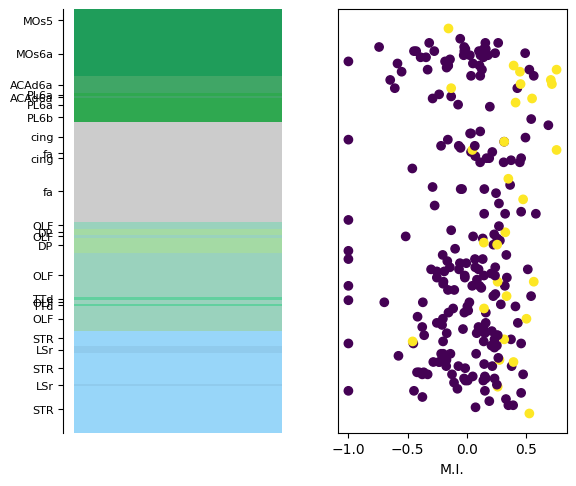

In [ ]:
#encodig of decision, cues, stimulus appear
#significant of respond to what
#stimulus cells, decision cells, reward cells. cues
#mix selectivity
#each cell have a propotion to different
#signal of noise ratio
#plot when insertion = 10
# ---------------------------------------------------
# Plot the modulation index for each unit across brain regions
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(6.5, 5.5)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster modulation index
axs[1].scatter(modulation_index, clusters_g['depths'], c=p_sig)  # color by significance
axs[1].set_xlabel('M.I.')
axs[1].get_yaxis().set_visible(False)
#to do: are we finding cluster with high level of significance?

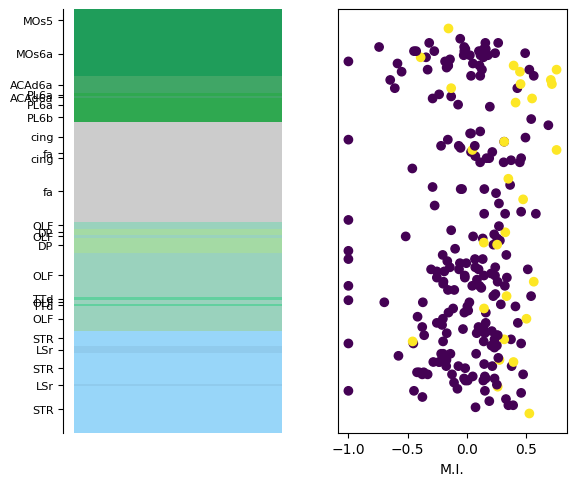

In [ ]:
#plot when insertion = 43
# ---------------------------------------------------
# Plot the modulation index for each unit across brain regions
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(6.5, 5.5)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster modulation index
axs[1].scatter(modulation_index, clusters_g['depths'], c=p_sig)  # color by significance
axs[1].set_xlabel('M.I.')
axs[1].get_yaxis().set_visible(False)
#to do: are we finding cluster with high level of significance?

In [ ]:
#can try to see if units are also selective to left / right conditions _after_ the first move, or _after_ the stimulus onset for example.

In [ ]:
cluster_STR_IDs = np.array(STR_df['cluster_id'])#np.array([161, 386])

In [ ]:
# ---------------------------------------------------
# Create PSTHs
binsize = 0.01  # bin size [sec] for neural binning
time_window = [-0.150, 0]

for count, clu_id in enumerate(cluster_STR_IDs):

    # Find spikes for this cluster
    spk_indx = np.where(np.isin(spikes_g['clusters'], clu_id))
    spikes_unit = {key: val[spk_indx] for key, val in spikes_g.items()}

    # Compute raster
    raster, timestamps = get_event_aligned_raster(spikes_unit['times'], events, tbin=binsize, values=None,
                                                  epoch=time_window, bin=True)
    # Compute PSTH (return only the mean)
    psth_a, _ = get_psth(raster, trial_ids=indx_choice_a)
    psth_b, _ = get_psth(raster, trial_ids=indx_choice_b)

    # ------- Stack PSTHs -------
    # Init ; Here we create a M = n condition x n unit x n time bin and will concatenate it later
    if count == 0:
        nbin = len(timestamps)
        nunit = len(cluster_STR_IDs)
        stack_psth = np.empty((2, nunit, nbin))

    stack_psth[0, count, :] = psth_a
    stack_psth[1, count, :] = psth_b

/usr/local/lib/python3.10/dist-packages/brainbox/task/trials.py:196: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(raster, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


[Text(0, 0, 'unit #1')]

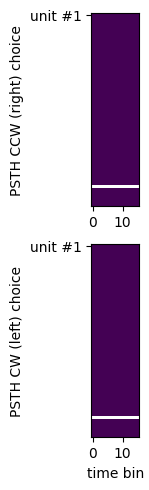

In [ ]:
# ---------------------------------------------------
# Plot stacked PSTHs
fig, ax = plt.subplots(2)
fig.set_size_inches(6.5, 5.5)
ax[0].imshow(stack_psth[0, :, :], vmax=stack_psth.max(), vmin=stack_psth.min())
ax[1].imshow(stack_psth[1, :, :], vmax=stack_psth.max(), vmin=stack_psth.min())
ax[0].set_xlabel('')
ax[1].set_xlabel('time bin')
ax[0].set_ylabel('PSTH CCW (right) choice')
ax[1].set_ylabel('PSTH CW (left) choice')

ytick_loc = [0]
ax[0].set_yticks(ytick_loc)
ax[1].set_yticks(ytick_loc)
ax[0].set_yticklabels(['unit #1'])
ax[1].set_yticklabels(['unit #1'])

In [ ]:
# ---------------------------------------------------
# Check that there are indeed only 2 values in choice
assert len(np.unique(choice)) == 2

# ---------------------------------------------------
# Use the spike count in the time window prior to the movement onset as predictors.
# We use the same time window as defined earlier (Encoding)
X = spike_count.T  # shape of spike_count : n units x n trials in set -> transpose to fit model
y = choice

# ---------------------------------------------------
# Split trials into test and training sets for the logistic regression.
# Take first half of trials for training, second half for testing (test_size = 0.5)
# Fix random seed to repeat results across runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ---------------------------------------------------
# See how many trials there is for choice +1 ; -1
print(f'Training set : {len(np.where(y_train == 1)[0])} choice +1 / {len(y_train)} trials')
print(f'Testing set : {len(np.where(y_test == 1)[0])} choice +1 / {len(y_test)} trials')

Training set : 270 choice +1 / 441 trials
Testing set : 280 choice +1 / 441 trials


In [ ]:
# ---------------------------------------------------
# Fit the logistic regression model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Use the test set to assess the model accuracy
choice_predicted = clf.predict(X_test)
n_trial_correct = len(np.where(y_test == choice_predicted)[0])
print(f'Accuracy : {n_trial_correct} trials correctly predicted / {len(y_test)} trials')
acc = n_trial_correct/len(y_test)
print(f'Accracy score : {acc}')

Accuracy : 287 trials correctly predicted / 441 trials
Accracy score : 0.6507936507936508


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install git+https://github.com/yuanz271/vlgpax.git

  Cloning https://github.com/yuanz271/vlgpax.git to /tmp/pip-req-build-i4zrlfez
  Running command git clone --filter=blob:none --quiet https://github.com/yuanz271/vlgpax.git /tmp/pip-req-build-i4zrlfez
  Resolved https://github.com/yuanz271/vlgpax.git to commit 0a4af5f19f20ed5a6b3c775887c127220bfbb185
  Preparing metadata (setup.py) ... done
  Created wheel for vlgpax: filename=vlgpax-2021.6.21-py3-none-any.whl size=10351 sha256=c553a2ab9072fb82f01dfa4391f33e50769c77ac08635852a76cdb5b425f8d28
  Stored in directory: /tmp/pip-ephem-wheel-cache-kp937hef/wheels/cc/54/08/e3f4f605aeb4faa23c72029532c3357937cb15cfc9698bf742
Successfully built vlgpax


In [ ]:
import math
import jax.random
import numpy as np
from matplotlib import pyplot as plt
from vlgpax.model import Session
from vlgpax.kernel import RBF, RFF
from vlgpax import vi

In [ ]:
spike_count_per_bin_STR.shape

(38, 4960)

In [ ]:
#do not continuous time points of trail
y = spike_count_per_bin_STR
T = 4960 #5520*0.1/10 = 55.2
dt = 1/10

In [ ]:
y.shape

(64, 5520)

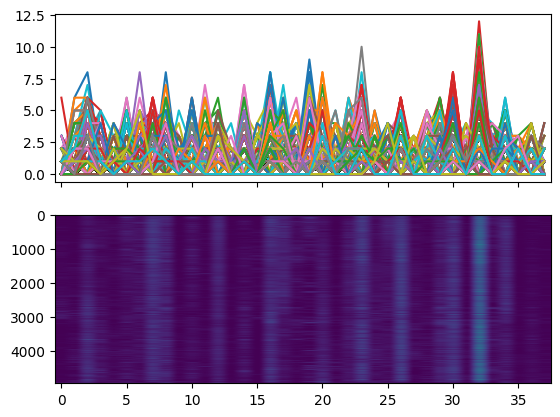

In [ ]:
# %% Draw all
fig, ax = plt.subplots(2, 1, sharex='all')
#ax[0].plot(z)  # latent
ax[0].plot(y)  # spikes
ax[1].imshow(y.T, aspect='auto')  # show spikes in heatmap

In [ ]:
random_seed = 0

In [ ]:
# %% Setup inference
ys = np.reshape(y,
                (10, T // 10, -1))  # Split the spike train into 10 trials
session = Session(dt)  # Construct a session.
# Session is the top level container of data. Two arguments, binsize and unit of time, are required at construction.
for i, y in enumerate(ys):
    session.add_trial(i + 1, y=y)  # Add trials to the session.
# Trial is the basic unit of observation, regressor, latent factors and etc.
# tid and y are only required argument to construct a trial.
# tid is an unique identifier of the trial,
# y is the spike train,
# x is an optional argument that represents the design matrix of
# such as spike history, stimuli, behavior, neuron coupling and etc.
# An constant column for bias is generated automatically if x is absent

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.


Initializing
Initialized
EM Iteration 1, 	Loss = 1.7950, 	M step: 3.21s, 	E step: 4.19s
EM Iteration 2, 	Loss = 1.7687, 	M step: 0.96s, 	E step: 2.08s
EM Iteration 3, 	Loss = 1.7514, 	M step: 1.21s, 	E step: 3.97s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')
/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 4, 	Loss = 1.7277, 	M step: 0.96s, 	E step: 4.69s
EM Iteration 5, 	Loss = 1.6941, 	M step: 0.94s, 	E step: 6.01s
EM Iteration 6, 	Loss = 1.6618, 	M step: 0.96s, 	E step: 4.74s
EM Iteration 7, 	Loss = 1.6388, 	M step: 0.93s, 	E step: 6.13s
EM Iteration 8, 	Loss = 1.6240, 	M step: 0.99s, 	E step: 4.90s
EM Iteration 9, 	Loss = 1.6135, 	M step: 0.78s, 	E step: 6.04s
EM Iteration 10, 	Loss = 1.6054, 	M step: 0.74s, 	E step: 4.68s
EM Iteration 11, 	Loss = 1.5988, 	M step: 0.76s, 	E step: 5.87s
EM Iteration 12, 	Loss = 1.5933, 	M step: 0.73s, 	E step: 4.61s
EM Iteration 13, 	Loss = 1.5886, 	M step: 0.73s, 	E step: 5.92s
EM Iteration 14, 	Loss = 1.5845, 	M step: 0.70s, 	E step: 4.64s
EM Iteration 15, 	Loss = 1.5809, 	M step: 0.65s, 	E step: 5.04s
EM Iteration 16, 	Loss = 1.5777, 	M step: 1.05s, 	E step: 4.74s
EM Iteration 17, 	Loss = 1.5748, 	M step: 0.67s, 	E step: 4.20s
EM Iteration 18, 	Loss = 1.5719, 	M step: 0.73s, 	E step: 6.37s
EM Iteration 19, 	Loss = 1.5693, 	M step: 0.70

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


Trial 2, 	Loss = -1.5650
Trial 3, 	Loss = 2.2699
Trial 4, 	Loss = -2.3371
Trial 5, 	Loss = 5.3707
Trial 6, 	Loss = 2.8306
Trial 7, 	Loss = 2.2722
Trial 8, 	Loss = -1.0280
Trial 9, 	Loss = 14.8869


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


Trial 10, 	Loss = -4.2442
Finished


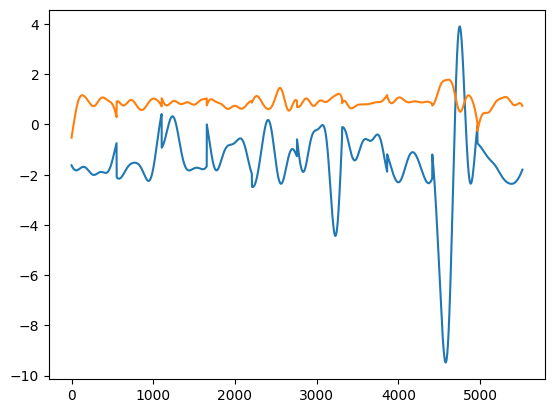

In [ ]:
#insertion 43, first movement, time_window = np.array([-0.1, 0.0])  # 100 ms before the event #longer time 200-300ms, 20-30
#same A for all trails, avg all trial, one object func to learn A fir all trials, infer z for each trial
#cross valivadation currently, keep z 1 or 2
plt.plot(session.z)  # Draw the result

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [ ]:
y.shape

(64, 5520)

In [ ]:
y_avg_cell = y.sum(axis = 0)/64

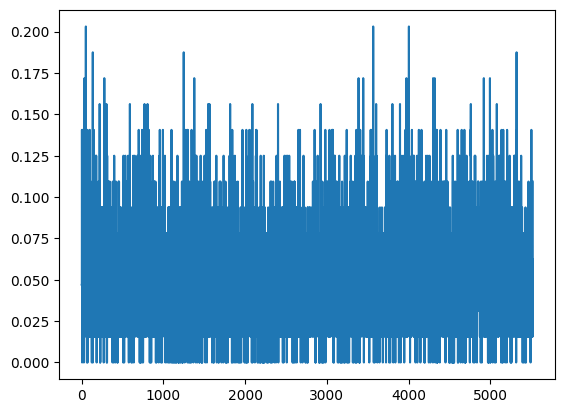

In [ ]:
plt.plot(y_avg_cell)

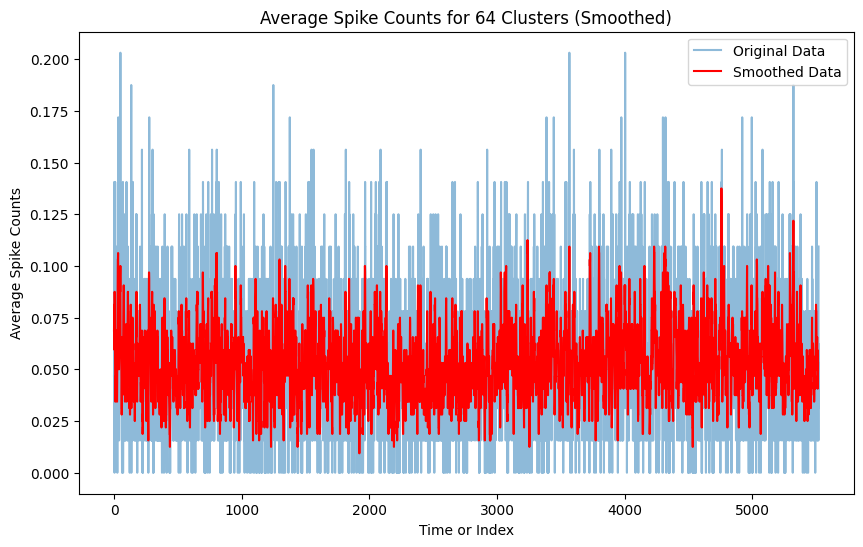

In [ ]:

# Assuming y is your spike count dataset with 64 clusters
# y_avg_cell = y.sum(axis = 0) / 64
# You already have y_avg_cell calculated

# Define a function for moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Smooth the data using a moving average
window_size = 5  # Adjust this value as needed for smoother or less smooth data
smoothed_y_avg_cell = moving_average(y_avg_cell, window_size)

# Adjust the x-axis (time or index) to match the length of the smoothed data
# Assuming you have a time array or an array of indices that matches y_avg_cell
time = np.arange(len(y_avg_cell))  # Replace or adjust if you have specific time data
adjusted_time = time[:len(smoothed_y_avg_cell)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, y_avg_cell, label='Original Data', alpha=0.5)
plt.plot(adjusted_time, smoothed_y_avg_cell, label='Smoothed Data', color='red')
plt.xlabel('Time or Index')
plt.ylabel('Average Spike Counts')
plt.title('Average Spike Counts for 64 Clusters (Smoothed)')
plt.legend()
plt.show()

In [ ]:
#latent variable = 1
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=1, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = 11.1170, 	M step: 2.37s, 	E step: 4.54s
EM Iteration 2, 	Loss = 11.1066, 	M step: 0.73s, 	E step: 2.15s
EM Iteration 3, 	Loss = 11.0990, 	M step: 1.02s, 	E step: 2.02s
EM Iteration 4, 	Loss = 11.0921, 	M step: 0.64s, 	E step: 1.71s
EM Iteration 5, 	Loss = 11.0859, 	M step: 0.67s, 	E step: 1.82s
EM Iteration 6, 	Loss = 11.0802, 	M step: 0.67s, 	E step: 1.87s
EM Iteration 7, 	Loss = 11.0750, 	M step: 0.69s, 	E step: 2.76s
EM Iteration 8, 	Loss = 11.0702, 	M step: 0.85s, 	E step: 1.67s
EM Iteration 9, 	Loss = 11.0658, 	M step: 0.61s, 	E step: 1.77s
EM Iteration 10, 	Loss = 11.0616, 	M step: 0.76s, 	E step: 1.80s
EM Iteration 11, 	Loss = 11.0578, 	M step: 0.64s, 	E step: 1.76s
EM Iteration 12, 	Loss = 11.0542, 	M step: 0.71s, 	E step: 2.86s
EM Iteration 13, 	Loss = 11.0509, 	M step: 0.71s, 	E step: 1.76s
EM Iteration 14, 	Loss = 11.0478, 	M step: 0.69s, 	E step: 1.79s
EM Iteration 15, 	Loss = 11.0449, 	M step: 0.73s, 	E step: 1.72s
EM Iterat

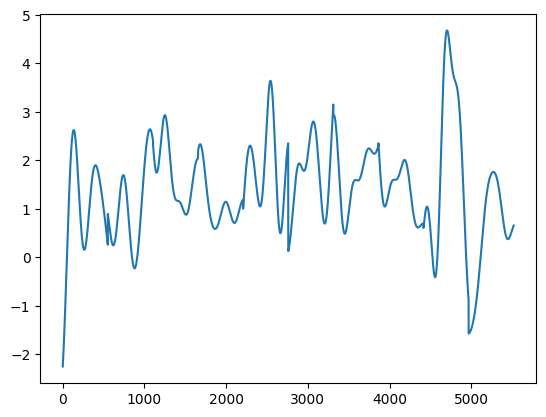

In [ ]:
plt.plot(session.z)

In [ ]:
#loop through, grid search to find the # of latent varibale with least loss

In [ ]:
y.T.shape

(5520, 64)

In [ ]:
y[:,:552].shape

(64, 552)

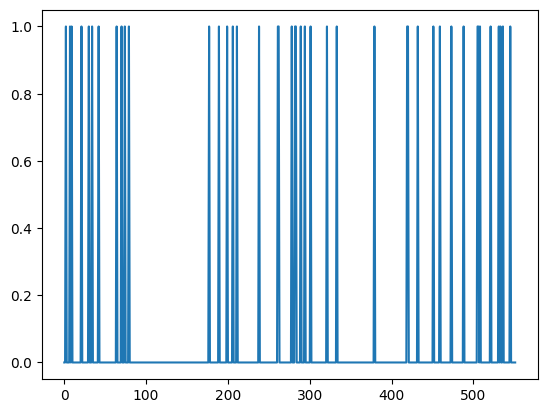

In [ ]:
plt.plot(y[1,:552].T)

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = -3.0711, 	M step: 2.19s, 	E step: 3.24s
EM Iteration 2, 	Loss = -3.2072, 	M step: 0.80s, 	E step: 2.10s
EM Iteration 3, 	Loss = -3.2093, 	M step: 0.71s, 	E step: 2.28s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 4, 	Loss = -3.2104, 	M step: 0.50s, 	E step: 1.67s
EM Iteration 5, 	Loss = -3.2110, 	M step: 0.46s, 	E step: 1.79s
EM Iteration 6, 	Loss = -3.2114, 	M step: 0.51s, 	E step: 3.02s
EM Iteration 7, 	Loss = -3.2116, 	M step: 0.49s, 	E step: 3.37s
EM Iteration 8, 	Loss = -3.2118, 	M step: 0.65s, 	E step: 3.44s
EM Iteration 9, 	Loss = -3.2121, 	M step: 0.48s, 	E step: 3.64s
EM Iteration 10, 	Loss = -3.2126, 	M step: 0.48s, 	E step: 4.26s
EM Iteration 11, 	Loss = -3.2133, 	M step: 0.75s, 	E step: 4.76s
EM Iteration 12, 	Loss = -3.2141, 	M step: 0.51s, 	E step: 4.00s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 13, 	Loss = -3.2147, 	M step: 0.47s, 	E step: 4.87s
EM Iteration 14, 	Loss = -3.2151, 	M step: 0.70s, 	E step: 4.35s
EM Iteration 15, 	Loss = -3.2151, 	M step: 0.50s, 	E step: 3.79s
EM: stopped at convergence
Inferring
Trial 1, 	Loss = -4.1474


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


Trial 2, 	Loss = -3.4971
Trial 3, 	Loss = -3.8616
Trial 4, 	Loss = -4.9083
Trial 5, 	Loss = -3.4225
Trial 6, 	Loss = -4.0743
Trial 7, 	Loss = -0.5710
Trial 8, 	Loss = -2.9276
Trial 9, 	Loss = 1.2773
Trial 10, 	Loss = -6.5519
Finished


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


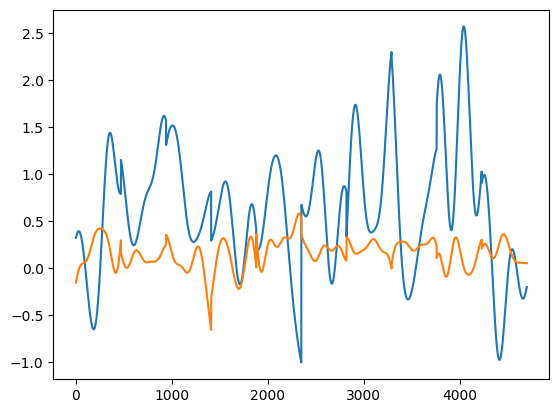

In [ ]:
#insertion 23, first movement, time_window = np.array([-0.1, 0.0])  # 100 ms before the event
plt.plot(session.z)

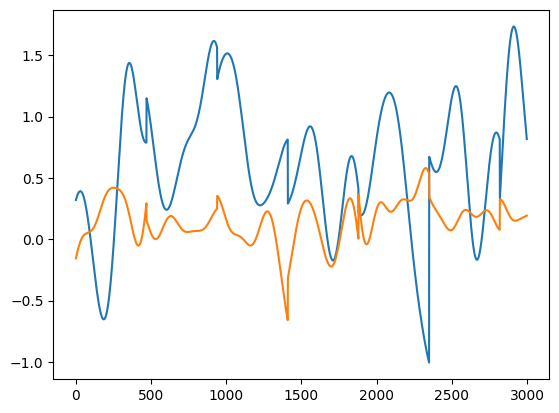

In [ ]:
plt.plot(session.z[:3000])

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = 17.2830, 	M step: 0.90s, 	E step: 4.16s
EM Iteration 2, 	Loss = 17.2529, 	M step: 0.75s, 	E step: 3.99s
EM Iteration 3, 	Loss = 17.2387, 	M step: 1.26s, 	E step: 2.92s
EM Iteration 4, 	Loss = 17.2278, 	M step: 0.39s, 	E step: 2.09s
EM Iteration 5, 	Loss = 17.2169, 	M step: 0.38s, 	E step: 2.80s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 6, 	Loss = 17.2027, 	M step: 0.36s, 	E step: 5.60s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 7, 	Loss = 17.1823, 	M step: 0.35s, 	E step: 3.83s
EM Iteration 8, 	Loss = 17.1556, 	M step: 0.36s, 	E step: 3.92s
EM Iteration 9, 	Loss = 17.1278, 	M step: 0.36s, 	E step: 5.76s
EM Iteration 10, 	Loss = 17.1042, 	M step: 0.39s, 	E step: 3.78s
EM Iteration 11, 	Loss = 17.0865, 	M step: 0.42s, 	E step: 3.68s
EM Iteration 12, 	Loss = 17.0732, 	M step: 0.39s, 	E step: 5.97s
EM Iteration 13, 	Loss = 17.0605, 	M step: 0.40s, 	E step: 4.25s
EM Iteration 14, 	Loss = 17.0500, 	M step: 0.44s, 	E step: 4.31s
EM Iteration 15, 	Loss = 17.0398, 	M step: 0.38s, 	E step: 5.80s
EM Iteration 16, 	Loss = 17.0310, 	M step: 0.37s, 	E step: 3.80s
EM Iteration 17, 	Loss = 17.0227, 	M step: 0.34s, 	E step: 3.85s
EM Iteration 18, 	Loss = 17.0154, 	M step: 0.39s, 	E step: 5.78s
EM Iteration 19, 	Loss = 17.0078, 	M step: 0.38s, 	E step: 3.85s
EM Iteration 20, 	Loss = 17.0009, 	M step: 0.35s, 	E step: 3.98s
EM Iteration 21, 	Loss = 16.9948, 	M step: 0.54s, 	E step: 5.61s
EM Iteration 22, 	Loss = 16.

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


Trial 2, 	Loss = 21.5694
Trial 3, 	Loss = 18.6182


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


Trial 4, 	Loss = 15.8644
Trial 5, 	Loss = 21.1773
Trial 6, 	Loss = 20.3478
Trial 7, 	Loss = 24.3121
Trial 8, 	Loss = 21.0613
Trial 9, 	Loss = 8.4209
Trial 10, 	Loss = 10.8932
Finished


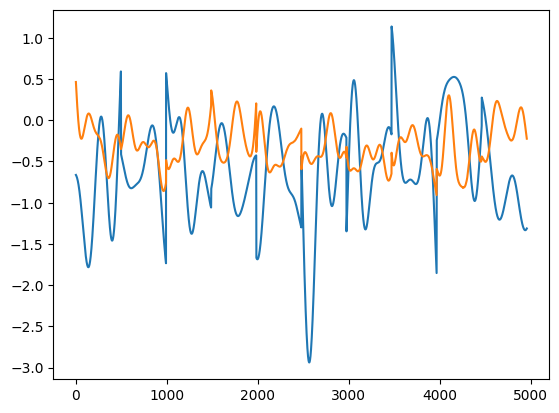

In [ ]:
#insertion 23, stimulus, time_window = np.array([-0.5, 1.5])  # 100 ms before the event
plt.plot(session.z)

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = 12.2563, 	M step: 1.69s, 	E step: 5.22s
EM Iteration 2, 	Loss = 12.2404, 	M step: 0.74s, 	E step: 2.38s
EM Iteration 3, 	Loss = 12.2314, 	M step: 0.44s, 	E step: 1.68s
EM Iteration 4, 	Loss = 12.2192, 	M step: 0.36s, 	E step: 2.56s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 5, 	Loss = 12.1964, 	M step: 0.37s, 	E step: 3.44s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 6, 	Loss = 12.1580, 	M step: 0.36s, 	E step: 5.63s
EM Iteration 7, 	Loss = 12.1228, 	M step: 0.33s, 	E step: 3.94s
EM Iteration 8, 	Loss = 12.0993, 	M step: 0.39s, 	E step: 3.94s
EM Iteration 9, 	Loss = 12.0845, 	M step: 0.39s, 	E step: 5.85s
EM Iteration 10, 	Loss = 12.0715, 	M step: 0.38s, 	E step: 3.80s
EM Iteration 11, 	Loss = 12.0611, 	M step: 0.37s, 	E step: 3.64s
EM Iteration 12, 	Loss = 12.0519, 	M step: 0.37s, 	E step: 5.50s
EM Iteration 13, 	Loss = 12.0437, 	M step: 0.37s, 	E step: 3.90s
EM Iteration 14, 	Loss = 12.0372, 	M step: 0.35s, 	E step: 3.70s
EM Iteration 15, 	Loss = 12.0314, 	M step: 0.39s, 	E step: 5.53s
EM Iteration 16, 	Loss = 12.0258, 	M step: 0.37s, 	E step: 3.68s
EM Iteration 17, 	Loss = 12.0207, 	M step: 0.44s, 	E step: 3.36s
EM Iteration 18, 	Loss = 12.0164, 	M step: 0.39s, 	E step: 4.96s
EM Iteration 19, 	Loss = 12.0121, 	M step: 0.59s, 	E step: 4.35s
EM Iteration 20, 	Loss = 12.0082, 	M step: 0.38s, 	E step: 3.83s
EM Iteration 21, 	Loss = 12.0

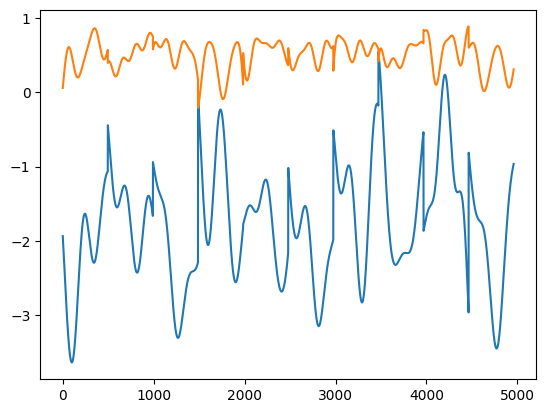

In [ ]:
#insertion 23, stimulus, time_window = np.array([0, 1])  # 100 ms after the event
# adjusting the time window to be smaller, from the stimulus happens 1s after stimulus, the trajectories seems separate and better than before
plt.plot(session.z)

In [ ]:
#discon